In [83]:
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

# Basic tools
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib        as mpl
%matplotlib inline

# Plot settings
mpl.rcParams['legend.frameon' ] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize' ] = 18
mpl.rcParams['axes.labelsize' ] = 18
mpl.rcParams['lines.linewidth'] = 2.5

In [91]:
# Load the data
featureName = ['stamp','your name','date','time','sex','weight','size','name','HairAmount','HairColor','HairStyle','Sign']
mydata = pd.read_csv('Reponses.csv', names=featureName, parse_dates=[['date', 'time']])
mydata = mydata[1:]
print('\nSize of the dataset: {}'.format(len(mydata)))

# Making binary sex column
binary_sex = mydata['sex']
binary_sex = [int('boy' in s) for s in binary_sex]
mydata['sex'] = binary_sex

# Adding time difference with expected delivery time (14 Oct - 12h)
mydata['dt']     = pd.to_datetime(mydata['date_time']) - pd.to_datetime('10-14-2017 12:00:00')
mydata['dtresp'] = pd.to_datetime(mydata['stamp'])     - pd.to_datetime('09-02-2017 09:00:00')

# Final conversions & printing
mydata = mydata.convert_objects(convert_numeric=True)
mydata.head()


Size of the dataset: 60


,date_time,stamp,your name,sex,weight,size,name,HairAmount,HairColor,HairStyle,Sign,dt,dtresp
1,9/21/2017 3:00:00 AM,9/20/2017 10:58:49,LEJEUNE DAVID,0,3.500,49.00,Lila Lilou Lou,5,5,1,J'aime bien ce jeu ... je crois que je vais y ...,-24 days +15:00:00,18 days 01:58:49
2,9/24/2017 4:07:00 AM,9/19/2017 20:59:30,E&S Les Binouss',0,2.851,49.59,"Morgann, Louenn, Fabiola",4,3,5,Livrée avec lunettes (batteries not included),-21 days +16:07:00,17 days 11:59:30
3,9/28/2017 4:32:00 AM,9/11/2017 16:52:15,Mercier Laure,1,3.115,53.00,"Erwan, Jules, Antoine",2,1,1,Il va sortir avec une éprouvette sous le bras ...,-17 days +16:32:00,9 days 07:52:15
4,9/30/2017 12:20:00 AM,9/4/2017 20:59:16,Mamie colas,0,3.400,50.00,Emma louise valentine,5,5,3,Grain de beaute sous le pied gauche,-15 days +12:20:00,2 days 11:59:16
5,10/1/2017 6:03:00 AM,9/8/2017 16:36:45,Julia Madar,1,2.900,56.00,"Erwan, leo, mathis",5,3,5,Un grain de beauté sur la joue!!!,-14 days +18:03:00,6 days 07:36:45


In [92]:
print(mydata[mydata['weight']>1800])

               date_time              stamp your name  sex  weight  size  \
14  10/7/2017 9:27:00 AM  9/5/2017 23:42:27     Guéna    0  2790.0  49.0   

                         name  HairAmount  HairColor  HairStyle          Sign  \
14  Camille   Léa  Valentine            2          4          1  Un nombril 😂   

                  dt          dtresp  
14 -8 days +21:27:00 3 days 14:42:27  


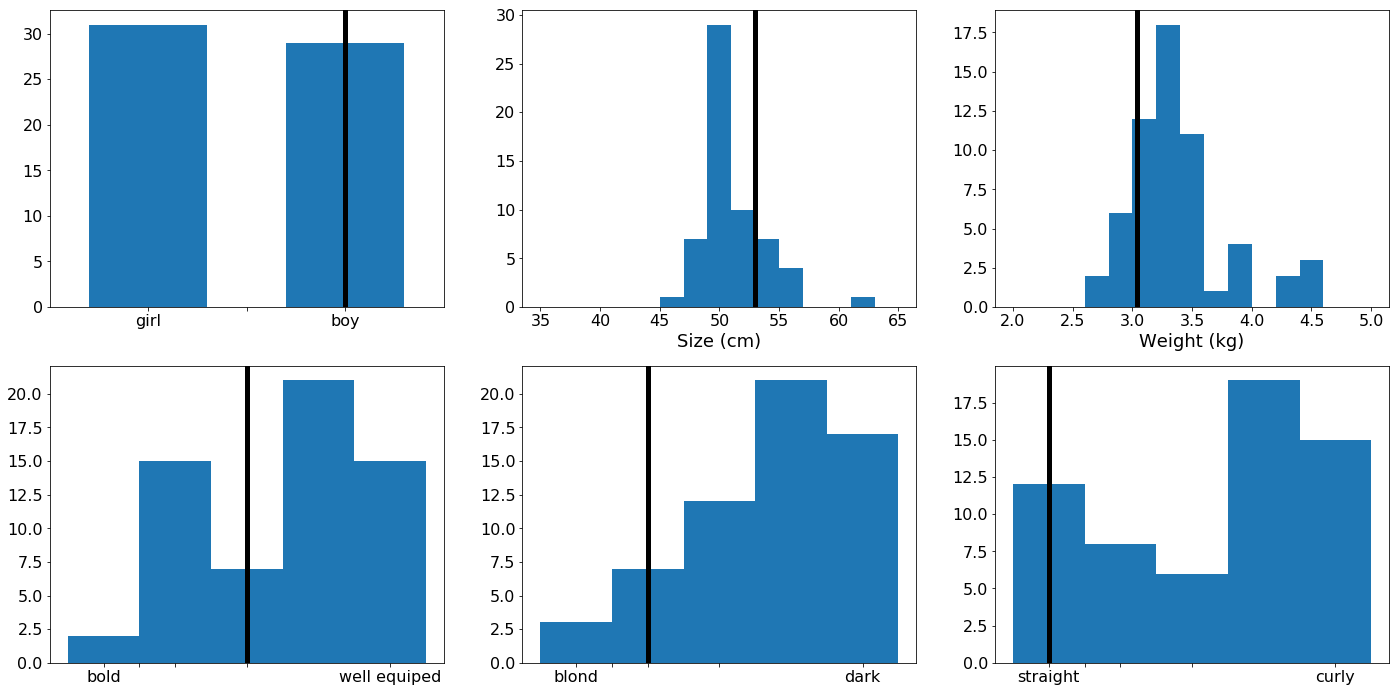

In [93]:
plt.figure(figsize=(24,12))

# Sex
plt.subplot(2,3,1)
plt.hist(mydata['sex'], bins=(-0.3,0.3,0.7,1.3) )
plt.xlim(-0.5,1.5)
plt.xticks([0,0.5,1],['girl','','boy'])
plt.axvline(x=1.0, color='black', linewidth=5.0)

# Size
plt.subplot(2,3,2)
plt.hist(mydata['size'], bins=15, range=(35,65))
plt.xlabel('Size (cm)')
plt.axvline(x=53.0, color='black', linewidth=5.0)

# Weight
plt.subplot(2,3,3)
plt.hist(mydata['weight'], bins=15, range=(2,5))
plt.xlabel('Weight (kg)')
plt.axvline(x=3.040, color='black', linewidth=5.0)

# Hair Amount
plt.subplot(2,3,4)
n,bins,_=plt.hist(mydata['HairAmount'], bins=5, range=(0.5,5.5))
plt.xticks([1,1.5,2,3,5],['bold','','','','well equiped'])
plt.axvline(x=3, color='black', linewidth=5.0)

# Hair Color
plt.subplot(2,3,5)
plt.hist(mydata['HairColor'], bins=5, range=(0.5,5.5))
plt.xticks([1,1.5,2,3,5],['blond','','','','dark'])
plt.axvline(x=2, color='black', linewidth=5.0)

# Hair Style
plt.subplot(2,3,6)
plt.hist(mydata['HairStyle'], bins=5, range=(0.5,5.5))
plt.xticks([1,1.5,2,3,5],['straight','','','','curly'])
plt.axvline(x=1, color='black', linewidth=5.0)

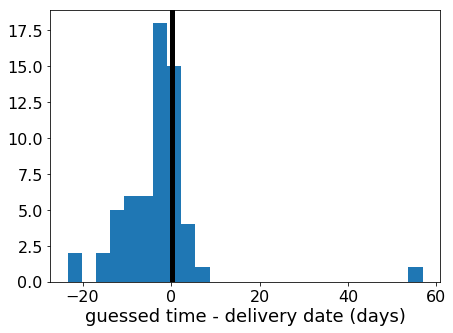

In [87]:
plt.figure(figsize=(7,5))
plt.hist( mydata['dt'].astype('timedelta64[h]')/24., bins=25)
plt.xlabel('guessed time - delivery date (days)')
dt_true = pd.Timedelta( pd.to_datetime('10-11-2017 19:40:00') - pd.to_datetime('10-14-2017 12:00:00')).seconds/(24.* 3600.)
plt.axvline(x=dt_true, color='black', linewidth=5.0)

Text(0.5,0,'Respond Time (days)')

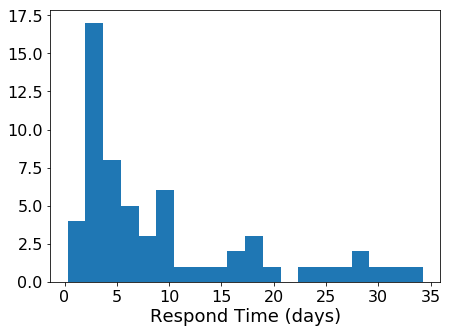

In [88]:
# How long the answer was done after the poll was sent (using time stamp)
plt.figure(figsize=(7,5))
plt.hist( mydata['dtresp'].astype('timedelta64[h]')/24., bins=20)
plt.xlabel('Respond Time (days)')

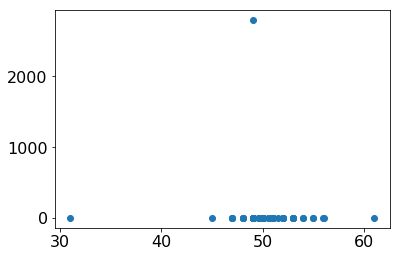

In [89]:
plt.scatter(mydata['size'],mydata['weight'])

In [90]:
data_per_sex = mydata.groupby('sex')
for key,data in data_per_sex:
    if (key==0):
        dataGirl=data
    if (key==1):
        dataBoy = data

In [77]:
dataBoy.head()

,date_time,stamp,your name,sex,weight,size,name,HairAmount,HairColor,HairStyle,Sign,dt,dtresp
3,9/28/2017 4:32:00 AM,9/11/2017 16:52:15,Mercier Laure,1,3.115,53.0,"Erwan, Jules, Antoine",2,1,1,Il va sortir avec une éprouvette sous le bras ...,-17 days +16:32:00,9 days 07:52:15
5,10/1/2017 6:03:00 AM,9/8/2017 16:36:45,Julia Madar,1,2.900,56.0,"Erwan, leo, mathis",5,3,5,Un grain de beauté sur la joue!!!,-14 days +18:03:00,6 days 07:36:45
8,10/2/2017 5:20:00 PM,9/2/2017 23:03:20,Julien Faivre,1,3.500,50.0,"Erwan, Robert, Romain Jr",2,4,3,Un tatouage sur le bras,-12 days +05:20:00,0 days 14:03:20
10,10/4/2017 5:30:00 PM,10/4/2017 14:00:51,LEJEUNE DAVID,1,4.500,53.0,Pedro Pablo Juanito,5,5,1,Porte la moustache,-10 days +05:30:00,32 days 05:00:51
11,10/5/2017 4:12:00 PM,9/2/2017 16:11:32,Mélisa Madar,1,3.400,54.0,Méliso,5,4,5,Beau gosse,-9 days +04:12:00,0 days 07:11:32


In [76]:
dataGirl.head()

,date_time,stamp,your name,sex,weight,size,name,HairAmount,HairColor,HairStyle,Sign,dt,dtresp
1,9/21/2017 3:00:00 AM,9/20/2017 10:58:49,LEJEUNE DAVID,0,3.500,49.00,Lila Lilou Lou,5,5,1,J'aime bien ce jeu ... je crois que je vais y ...,-24 days +15:00:00,18 days 01:58:49
2,9/24/2017 4:07:00 AM,9/19/2017 20:59:30,E&S Les Binouss',0,2.851,49.59,"Morgann, Louenn, Fabiola",4,3,5,Livrée avec lunettes (batteries not included),-21 days +16:07:00,17 days 11:59:30
4,9/30/2017 12:20:00 AM,9/4/2017 20:59:16,Mamie colas,0,3.400,50.00,Emma louise valentine,5,5,3,Grain de beaute sous le pied gauche,-15 days +12:20:00,2 days 11:59:16
6,10/1/2017 2:00:00 AM,9/20/2017 7:05:57,LEJEUNE David,0,4.500,53.00,Maryvonne Goulwena Mazhevenn,3,1,1,des tâches de rousseur (je sais elles apparais...,-14 days +14:00:00,17 days 22:05:57
7,10/2/2017 12:00:00 AM,9/2/2017 18:02:12,Madar Eric,0,3.100,51.00,Léa Rose Cécilia,4,2,4,Fait bien ses nuits,-13 days +12:00:00,0 days 09:02:12


In [72]:
def getNames(data_frame):
    res=[]
    for name in data_frame['name']:
        for na in name.split(' '):
            if (na is not ''   and 
                na is not ' '  and 
                na is not ','  and
                na is not ';'  and 
                na is not '-'  and 
                '(' not in na  and
                ')' not in na    ):
                    finalname=na.replace(',','')
                    res.append( finalname )
                    
    ToBeRemoved = ['et','ou','hi']
    for s in ToBeRemoved:
        if (s in res):
            res.remove(s)
    res.sort()
    return res

namesGirl = getNames(dataGirl)
namesBoy  = getNames(dataBoy)

In [73]:
from collections import Counter

def plotNameFrequency(name_array):
        
    # Get the counts
    counts = Counter(name_array)
    labels, values = zip(*counts.items())

    # sort your values in descending order
    indSort = np.argsort(values)[::-1]

    # rearrange/plot the data
    labels = np.array(labels)[indSort]
    values = np.array(values)[indSort]
    plt.figure(figsize=(20,8))
    plt.bar(np.arange(len(labels)), values)
    plt.xticks(indexes, labels, rotation='vertical')
    plt.tight_layout()
    
    return

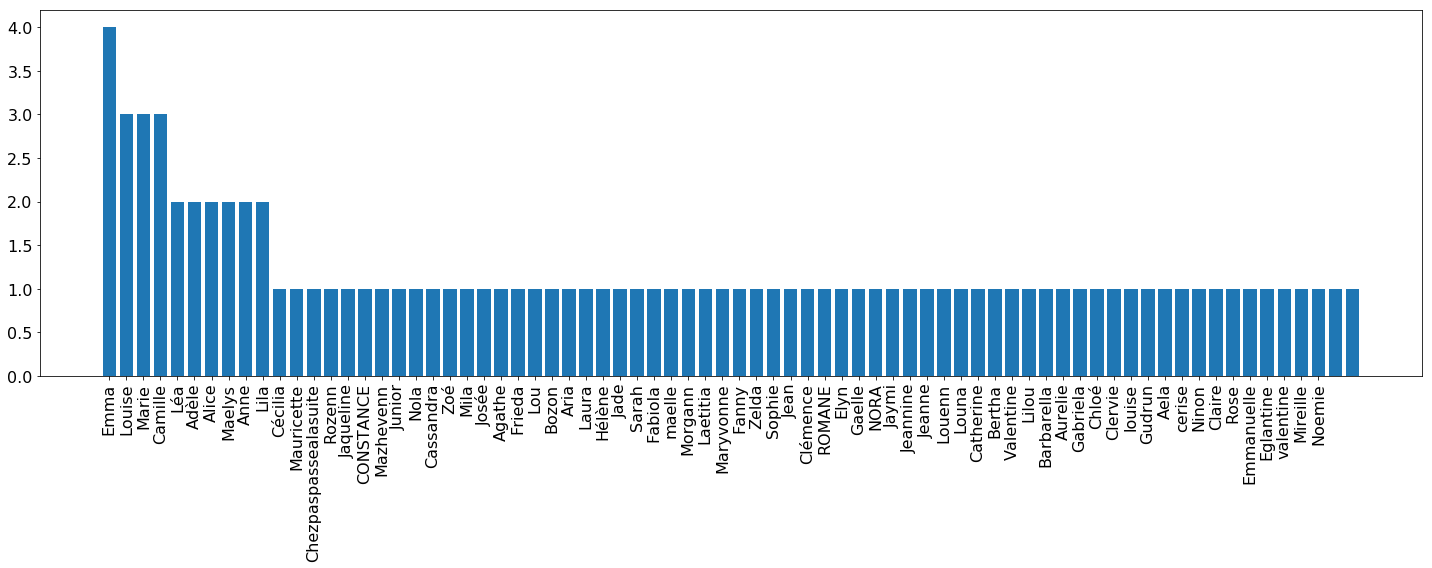

In [74]:
plotNameFrequency(namesGirl)

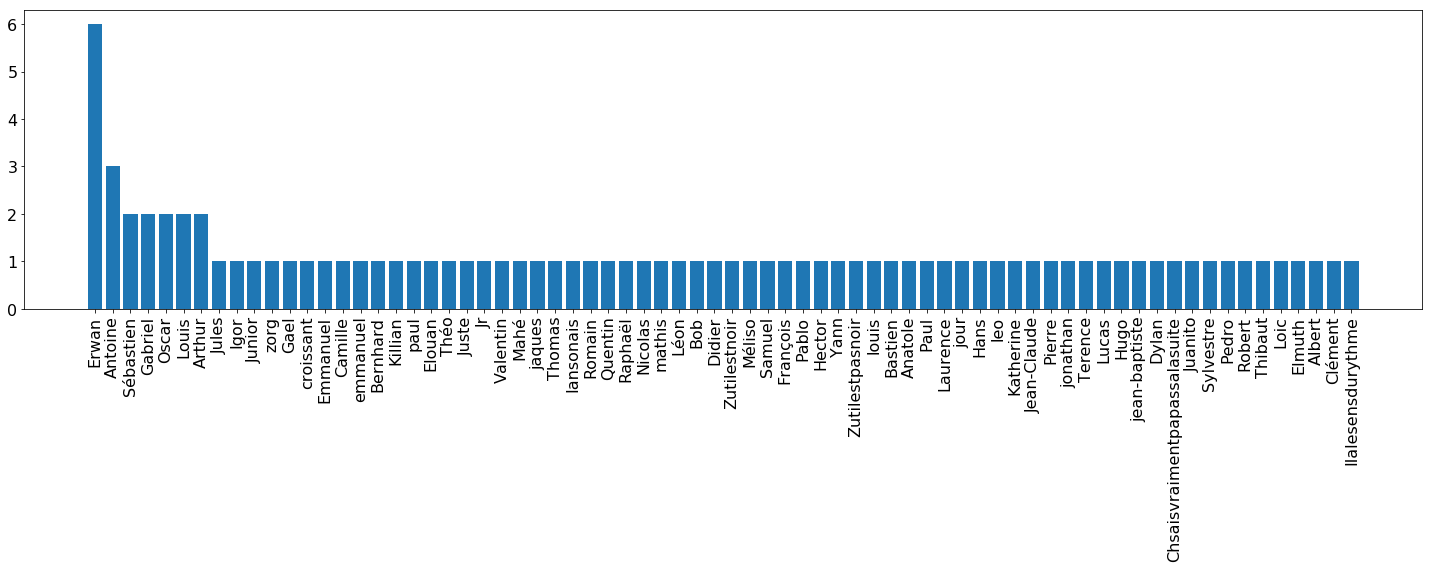

In [75]:
plotNameFrequency(namesBoy)